# Modelo de Regressão (CinemaTicketRef Dataset)

### Objetivo:
Tentar prever o preço total de vendas com base em outras variáveis

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sklearn

pd.set_option('float_format', '{:f}'.format)

df = pd.read_csv('datasets/cinematicket_ref.csv', sep=",", header=0)

display(df.head(10))

# removendo string data, pois so tem filmes de 2018, e temos month, quarter, day em outras colunas
df = df.drop(['date'], axis=1)


,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.260000,150000.000000,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.080000,80000.000000,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.000000,80000.000000,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.010000,100000.000000,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.670000,80000.000000,15,89.982004,2018-05-05,5,2,5
5,1492,71,1050000,7,0,3,0.980000,150000.000000,7,714.285714,2018-05-05,5,2,5
6,1492,163,1020000,10,0,3,7.690000,102000.000000,10,130.039012,2018-05-05,5,2,5
7,1492,450,750000,5,0,3,1.570000,150000.000000,5,318.471338,2018-05-05,5,2,5
8,1492,51,750000,11,0,2,0.950000,68181.818182,11,1157.894737,2018-05-05,5,2,5
9,1492,522,600000,4,0,3,1.550000,150000.000000,4,258.064516,2018-05-05,5,2,5


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  month         142524 non-null  int64  
 11  quarter       142524 non-null  int64  
 12  day           142524 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 14.1 MB


In [144]:
display(df.describe())

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,12347275.407531,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,30654858.289367,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,2.195843,0.809692,8.949471
min,1471.000000,32.000000,20000.000000,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1260000.000000,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3720000.000000,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,11100000.000000,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1262819994.000000,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


### Tratamento de dados

procurando celulas vazias

In [145]:

missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

print('porcentagem de valores faltando', (total_missing/total_cells) * 100)

print(df.isnull().sum())

porcentagem de valores faltando 0.013493004147209754
film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
month             0
quarter           0
day               0
dtype: int64


preenchendo as celulas vazias com a media de cada coluna

In [146]:
# vamos preencher celulas vazias com a media de cada coluna

mean_occurrence = df['occu_perc'].mean()
mean_capacity = df['capacity'].mean()

df['occu_perc'].fillna(mean_occurrence, inplace=True)
df['capacity'].fillna(mean_capacity, inplace=True)

print(df.isnull().sum())

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
month           0
quarter         0
day             0
dtype: int64


procurando valores repetidos

In [147]:
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

print(df.duplicated().sum())


106
0


removendo valores negativos

In [104]:
df_filtered1 = df[ (df['ticket_use'] < 0) ].index
df.drop(df_filtered1, inplace=True)
df_filtered2 = df[ (df['capacity'] < 0) ].index
df.drop(df_filtered2, inplace=True)
display(df.describe())

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142409.000000,142409.000000,142409.000000,142409.000000,142409.000000,142409.000000,142284.000000,142409.000000,142409.000000,142284.000000,142409.000000,142409.000000,142409.000000
mean,1518.969531,320.280151,12355668.779241,140.219200,0.212859,3.932848,19.979807,81243.793307,140.006341,855.130378,6.775709,2.634293,16.112942
std,36.181324,159.663698,30665755.790709,279.851795,2.413850,3.056849,22.656404,33235.838685,279.643146,953.274507,2.195518,0.809480,8.949522
min,1471.000000,32.000000,20000.000000,1.000000,0.000000,1.000000,0.030000,483.870968,0.000000,10.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1280000.000000,18.000000,0.000000,2.000000,3.760000,60000.000000,18.000000,277.777778,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3720000.000000,50.000000,0.000000,3.000000,10.370000,79478.260870,50.000000,525.936599,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,11120000.000000,143.000000,0.000000,5.000000,28.230000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1262819994.000000,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


Histograma dos dados

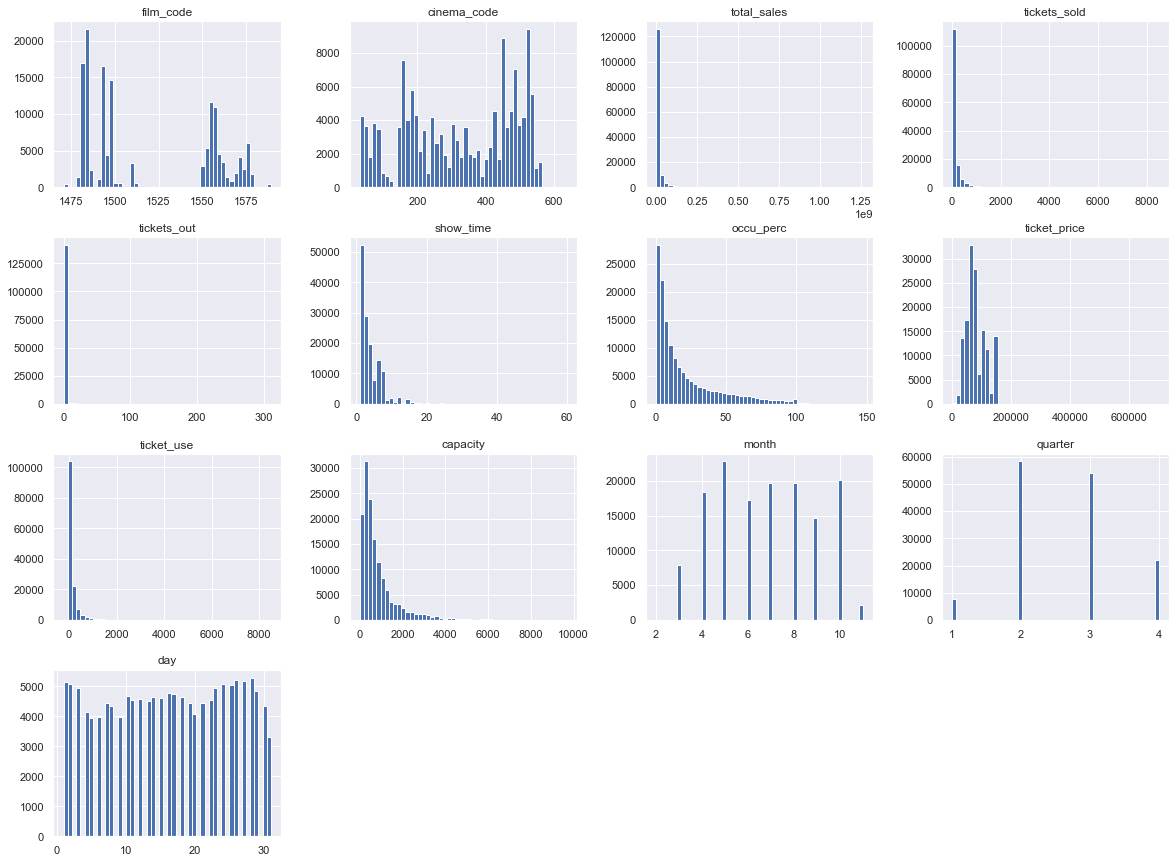

In [148]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

Quantidade de 0s

In [149]:
df.lt(0).sum()

film_code        0
cinema_code      0
total_sales      0
tickets_sold     0
tickets_out      0
show_time        0
occu_perc        0
ticket_price     0
ticket_use      61
capacity        54
month            0
quarter          0
day              0
dtype: int64

### Boxplots

<AxesSubplot:>

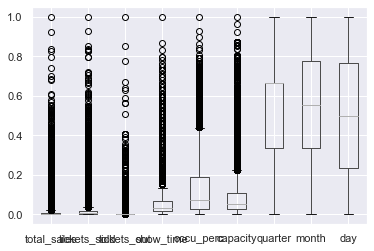

In [150]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

scaled_df.boxplot(
    column=['total_sales', 'tickets_sold', 'tickets_out', 'show_time',  'occu_perc', 'capacity', 'quarter', 'month' , 'day'])

### Matriz de correlação

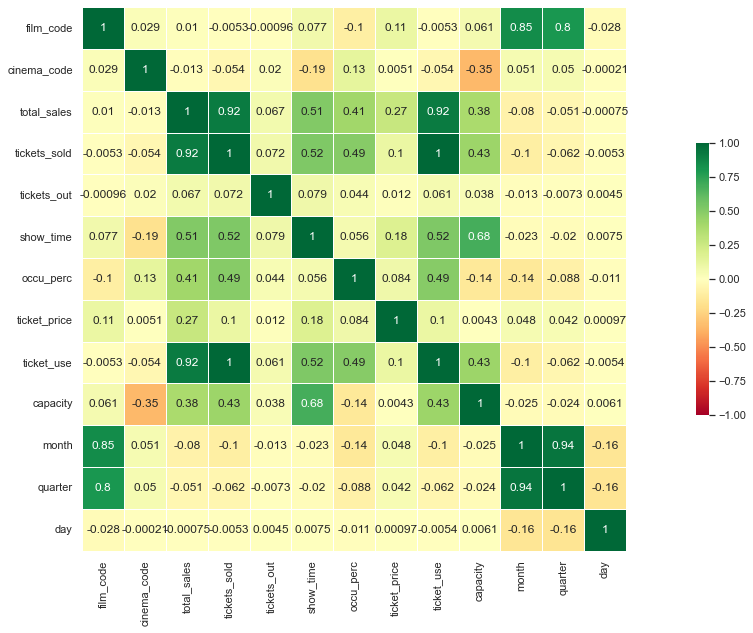

In [151]:
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(25, 10))
corr = df.corr()

sns.heatmap(corr, annot=True, cmap='RdYlGn', vmax=1,
        vmin=-1, center=0, square=True,
        linewidth=.5, cbar_kws={"shrink":.5})

plt.show()


### Removendo Ticket_use pela sua multicolinearidade

In [152]:
df = df.drop(['ticket_use'], axis=1)
df

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,capacity,month,quarter,day
0,1492,304,3900000,26,0,4,4.260000,150000.000000,610.328638,5,2,5
1,1492,352,3360000,42,0,5,8.080000,80000.000000,519.801980,5,2,5
2,1492,489,2560000,32,0,4,20.000000,80000.000000,160.000000,5,2,5
3,1492,429,1200000,12,0,1,11.010000,100000.000000,108.991826,5,2,5
4,1492,524,1200000,15,0,3,16.670000,80000.000000,89.982004,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.860000,60000.000000,569.948187,11,4,4
142520,1569,474,1200000,15,0,1,65.220000,80000.000000,22.999080,11,4,4
142521,1569,524,1060000,8,0,3,9.200000,132500.000000,86.956522,11,4,4
142522,1569,529,600000,5,0,2,5.000000,120000.000000,100.000000,11,4,4


# 

### Fazendo a normalização

In [153]:
# scaler = MinMaxScaler()

# for col in df.columns:
#     df[col] = scaler.fit_transform(df[[col]])

# display(df.describe())

In [154]:
cinema={}
# cinema["features"] = np.hstack([df.values[::, :2], df.values[::, 3:]])
# cinema["target"] = df.values[:, 2]

# cinema["features"] = df[['tickets_sold', 'tickets_out', 'ticket_price', 'show_time',  'occu_perc', 'capacity', 'quarter', 'month' , 'day']]
cinema["features"] = scaled_df[['tickets_out', 'ticket_price', 'show_time',  'occu_perc', 'capacity', 'quarter', 'month' , 'day']]
cinema["target"] = scaled_df['total_sales']

print(cinema['features'].shape)
print(cinema['target'].shape)

display(cinema['features'])
display(cinema['target'])

(142418, 8)
(142418,)


,tickets_out,ticket_price,show_time,occu_perc,capacity,quarter,month,day
0,0.000000,0.213742,0.050847,0.028881,0.063165,0.333333,0.333333,0.133333
1,0.000000,0.113673,0.067797,0.054780,0.053827,0.333333,0.333333,0.133333
2,0.000000,0.113673,0.050847,0.135593,0.016711,0.333333,0.333333,0.133333
3,0.000000,0.142264,0.000000,0.074644,0.011449,0.333333,0.333333,0.133333
4,0.000000,0.113673,0.033898,0.113017,0.009488,0.333333,0.333333,0.133333
...,...,...,...,...,...,...,...,...
142413,0.000000,0.085082,0.016949,0.026169,0.059000,1.000000,1.000000,0.100000
142414,0.000000,0.113673,0.000000,0.442169,0.002579,1.000000,1.000000,0.100000
142415,0.000000,0.188725,0.033898,0.062373,0.009176,1.000000,1.000000,0.100000
142416,0.000000,0.170855,0.016949,0.033898,0.010522,1.000000,1.000000,0.100000


0        0.003073
1        0.002645
2        0.002011
3        0.000934
4        0.000934
           ...   
142413   0.001029
142414   0.000934
142415   0.000824
142416   0.000459
142417   0.000182
Name: total_sales, Length: 142418, dtype: float64

Utilizando o modelo Gaussiano podemos observar que 68% do total sales fica de -18301689.16 a 42973469.84

In [155]:

print(df['total_sales'].describe())

print(np.mean(df['total_sales']) - np.std(df['total_sales']))
print(np.mean(df['total_sales'] + np.std(df['total_sales'])))

count       142418.000000
mean      12335890.338223
std       30637687.066136
min          20000.000000
25%        1260000.000000
50%        3710000.000000
75%       11100000.000000
max     1262819994.000000
Name: total_sales, dtype: float64
-18301689.165172342
42973469.841500685


### Observando mais sobre o total sales

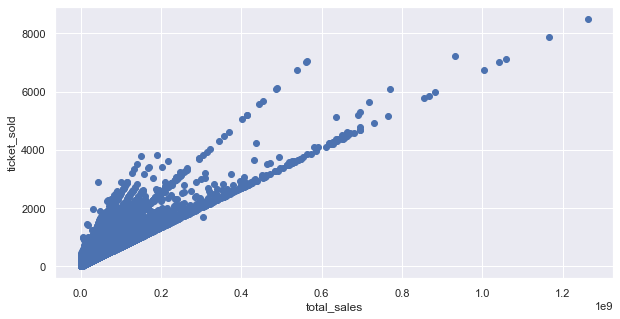

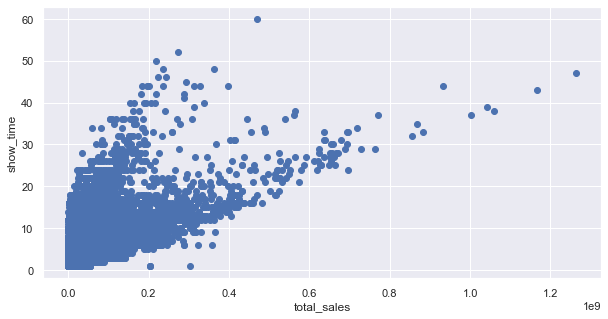

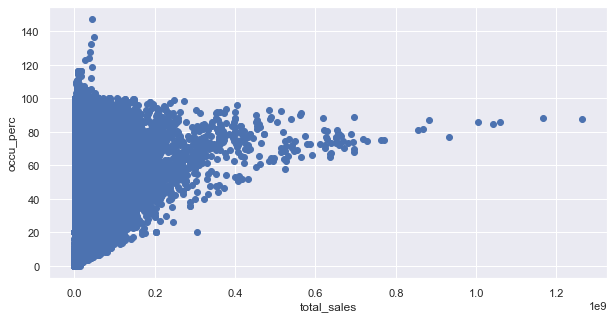

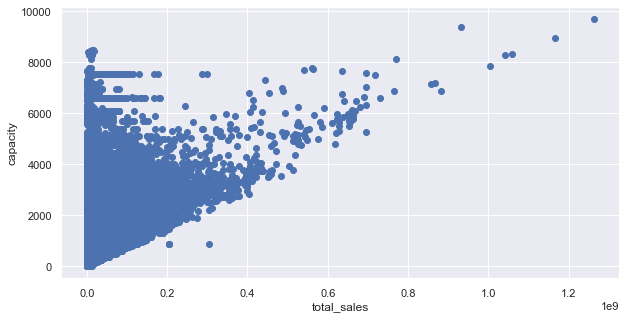

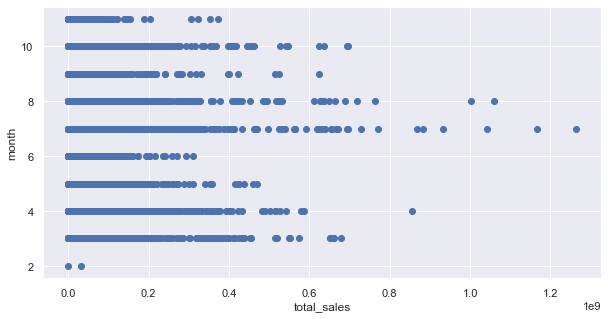

In [156]:
plt.figure(figsize = (10,5))
plt.scatter(df['total_sales'], df['tickets_sold'])
plt.xlabel('total_sales')
plt.ylabel('ticket_sold')
plt.show()

plt.figure(figsize = (10,5))
plt.scatter(df['total_sales'], df['show_time'])
plt.xlabel('total_sales')
plt.ylabel('show_time')
plt.show()

plt.figure(figsize = (10,5))
plt.scatter(df['total_sales'], df['occu_perc'])
plt.xlabel('total_sales')
plt.ylabel('occu_perc')
plt.show()

plt.figure(figsize = (10,5))
plt.scatter(df['total_sales'], df['capacity'])
plt.xlabel('total_sales')
plt.ylabel('capacity')
plt.show()

plt.figure(figsize = (10,5))
plt.scatter(df['total_sales'], df['month'])
plt.xlabel('total_sales')
plt.ylabel('month')
plt.show()



### Aplicando Regressão linear

Mean squared error: 0.000315
Mean absolute error: 0.008958
Root Mean squared error: 0.017761
R2 score: 0.453434
Coefficients: 
 [ 0.03571932  0.0933199   0.1408775   0.06485299  0.05702442  0.0040199
 -0.00591904 -0.00027716]
Intercept: 
 -0.02072060697956122
Score: 
 0.4534335891699305
scores: 
 [-0.00048273 -0.00028207 -0.00029979 -0.00039589 -0.00022149 -0.0002775
 -0.00025764]
scores mean:  -0.0003167309959488766
scores std:  8.401456392779049e-05


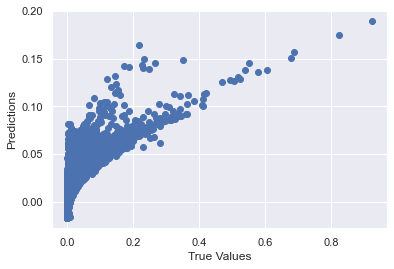

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(cinema['features'], cinema['target'], test_size=0.3)

# train the model
model = LinearRegression()
model.fit(x_train, y_train)

# make predictions
y_pred = model.predict(x_test)

# evaluate the model
print('Mean squared error: %f' % mean_squared_error(y_test, y_pred)) # dif entre valor predito e valor real elevar ao quadrado, soma todos os erros e divide pelo numero de amotras
print('Mean absolute error: %f' % mean_absolute_error(y_test, y_pred)) # quanto que em media o modelo esta errando o valor do total de sales
print('Root Mean squared error: %f' %(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 score: %f' % r2_score(y_test, y_pred))


print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)
print('Score: \n', model.score(x_test, y_test))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_test, y_test, cv=7, scoring='neg_mean_squared_error')
print('scores: \n', scores)

print('scores mean: ', scores.mean())
print('scores std: ', scores.std())

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

### Utilizando outros modelos de Regressão Linear para verificar o resultado

In [158]:
def norma_l2(X):
    X = X.astype(float)
    X = X - np.mean(X, axis=0)
    X = X / np.linalg.norm(X, axis=0)
    return X

### Lasso Regression

In [159]:
from sklearn.linear_model import Lasso

ls = Lasso(alpha=0.01)
ls_scores = cross_val_score(ls, norma_l2(cinema["features"]), cinema["target"], cv=7, error_score="raise")

print('ls score: ', ls_scores.mean())


ls score:  -0.12003942414911835


### Ridge Regression

In [160]:
from sklearn.linear_model import Ridge


rg = Ridge(alpha=0.05)
lr = LinearRegression()

lr_scores = cross_val_score(lr, norma_l2(cinema["features"]), cinema["target"], cv=7)
print(lr_scores)
print('lr mean scores: ', lr_scores.mean())

rg_scores = cross_val_score(rg, norma_l2(cinema["features"]), cinema["target"], cv=7)
print('rg mean scores: ', rg_scores.mean())

from sklearn.linear_model import RidgeCV

rg = RidgeCV(alphas=(1.0, 0.1, 0.01, 0.005, 0.0025, 0.001, 0.00025))
rg.fit(norma_l2(cinema["features"]), cinema["target"])

print('rg alpha: ', rg.alpha_)

[-0.09728204 -0.73258695  0.43158223  0.47710795  0.43155791  0.47172668
  0.3965364 ]
lr mean scores:  0.19694888212888792
rg mean scores:  0.22425882036065786
rg alpha:  0.00025


### ElasticNet Regression

In [161]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

en = ElasticNet(alpha=0.001, l1_ratio=0.8)
en_scores = cross_val_score(en, norma_l2(cinema["features"]), cinema["target"], cv=10)

print('ElasticNet mean scores: ',en_scores.mean())

encv = ElasticNetCV(alphas=(0.1, 0.01, 0.005, 0.0025, 0.001), l1_ratio=(0.1, 0.25, 0.5, 0.75, 0.8))
encv.fit(norma_l2(cinema["features"]), cinema["target"])

print(encv.alpha_)
print(encv.l1_ratio_)

ElasticNet mean scores:  -0.10596388179918007
0.1
0.1


### Polinomial

#### Polinomial grau 2

score:  0.9497832303074549
Coefficients:  [-1.55466746e-17 -6.42944334e-03 -9.87479421e-02 -1.59210272e-01
 -7.29986986e-02 -7.81211622e-02 -5.74906096e-03  9.84663559e-03
  1.00778424e-03 -1.90482729e-02  3.35843306e-01 -4.00920136e-02
  6.64892808e-02 -1.79971222e-01  1.36147627e-01 -1.62080619e-01
 -1.40717644e-02  4.56770911e-02  1.03479730e+00  5.16793760e-01
  7.08154954e-01  5.28675081e-02 -6.84065108e-02 -3.60973755e-03
 -2.25156261e-01  1.66927709e-01  3.98048673e-01 -4.69089929e-02
  5.89851460e-02 -8.02828315e-05  1.69123104e-02  9.27912871e-01
 -8.55378166e-03  5.94994982e-03  3.68102992e-04 -7.40244355e-02
 -6.66904327e-03 -4.93674238e-03 -1.28590586e-03  3.28700981e-03
 -2.44749582e-03 -3.02284888e-04 -2.34636953e-03 -2.45031067e-04
 -2.19666668e-04]
Intercept:  0.011069841320072177
Mean squared error: 0.000029
Mean absolute error: 0.002664
Root Mean squared error: 0.005392
R2 score: 0.949783


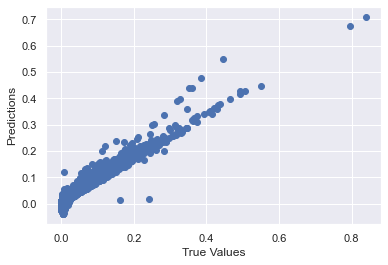

In [162]:
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PolynomialFeatures

cinema["features"] = scaled_df[['tickets_out', 'ticket_price', 'show_time',  'occu_perc', 'capacity', 'quarter', 'month' , 'day']]
cinema["target"] = scaled_df['total_sales']

x_train, x_test, y_train, y_test = train_test_split(cinema['features'], cinema['target'], test_size=0.3)

poly_reg2 = PolynomialFeatures(degree=2)

x_poly = poly_reg2.fit_transform(cinema['features'])

regressor = LinearRegression()

regressor.fit(x_poly, cinema['target'])

y_pred = regressor.predict(poly_reg2.fit_transform(x_test))


print('score: ', regressor.score(poly_reg2.fit_transform(x_test), y_test))

print('Coefficients: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)

print('Mean squared error: %f' % mean_squared_error(y_test, y_pred)) # dif entre valor predito e valor real elevar ao quadrado, soma todos os erros e divide pelo numero de amotras
print('Mean absolute error: %f' % mean_absolute_error(y_test, y_pred)) # quanto que em media o modelo esta errando o valor do total de sales
print('Root Mean squared error: %f' %(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 score: %f' % r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


#### Polinomial grau 3

score:  0.9973525775133102
Coefficients:  [ 1.13551292e-02  2.45476880e-03 -3.13536001e-03  7.58601338e-04
 -4.59412579e-04 -7.93725397e-04  2.62113705e+01 -2.62108847e+01
 -2.18285777e-04  3.54104147e-03 -1.08710190e-02  5.71680182e-02
 -1.22578856e-02 -5.20206724e-02  7.36187781e-03 -2.37352898e-03
 -3.80598413e-03  2.18077050e-02  4.71179357e-03  3.06144646e-03
  1.60696075e-03 -1.06221228e-02  7.77651872e-03  1.57064535e-03
  2.08857092e-03 -2.73570554e-03 -1.64341944e-03  3.63591468e-03
 -4.15090269e-03 -1.41451204e-03  1.10968883e-03  6.62752890e-03
 -8.14207476e-04  2.93212053e-04  2.26880299e-04  2.06326369e-03
 -1.00844354e-03  9.65239370e-04  5.69865925e-04 -1.10568412e-03
  2.24432783e-03  4.07910015e-04 -1.45864998e-03 -4.87469321e-04
  3.68059888e-04  3.95958654e-03  6.66123247e-03  2.78145708e-04
  1.19359881e-02  3.80865707e-03 -3.91504898e-02  2.86770993e-02
 -6.79430950e-03  9.08293738e-02 -3.90074808e-01  7.88224804e-03
  2.14947574e-01 -6.52375747e-02  2.23218614e-02

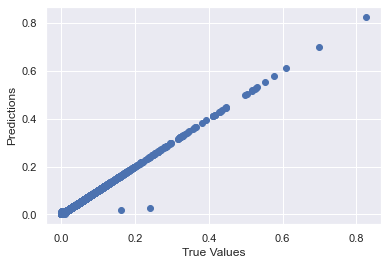

In [163]:
x_train, x_test, y_train, y_test = train_test_split(cinema['features'], cinema['target'], test_size=0.3)

poly_reg4 = PolynomialFeatures(degree=3)

x_poly = poly_reg4.fit_transform(cinema['features'])

regressor = LinearRegression()

regressor.fit(x_poly, cinema['target'])

y_pred = regressor.predict(poly_reg4.fit_transform(x_test))


print('score: ', regressor.score(poly_reg4.fit_transform(x_test), y_test))

print('Coefficients: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)

print('Mean squared error: %f' % mean_squared_error(y_test, y_pred)) # dif entre valor predito e valor real elevar ao quadrado, soma todos os erros e divide pelo numero de amotras
print('Mean absolute error: %f' % mean_absolute_error(y_test, y_pred)) # quanto que em media o modelo esta errando o valor do total de sales
print('Root Mean squared error: %f' %(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 score: %f' % r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

Text(0.5, 1.0, 'MSE VS Degree')

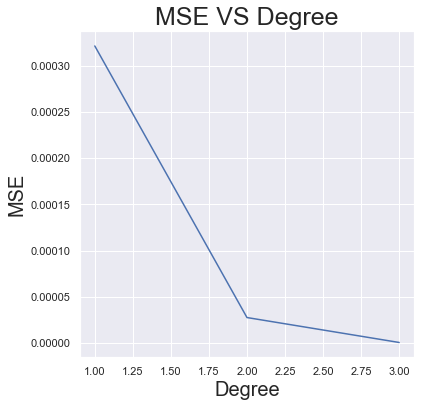

In [164]:
from sklearn.model_selection import cross_validate

x_train, x_test, y_train, y_test = train_test_split(cinema['features'], cinema['target'], test_size=0.3)

maxdegree=4
training_error=[]
cross_validation_error=[]
for d in range(1,maxdegree):
    x_poly_train=PolynomialFeatures(degree=d).fit_transform(x_train)
    x_poly_test=PolynomialFeatures(degree=d).fit_transform(x_test)
    lr=LinearRegression(fit_intercept=False)
    model=model.fit(x_poly_train,y_train)
    y_train_pred=model.predict(x_poly_train)
    mse_train=mean_squared_error(y_train,y_train_pred)
    cve=cross_validate(lr,x_poly_train,y_train,scoring='neg_mean_squared_error',cv=5,return_train_score=True)
    training_error.append(mse_train)
    cross_validation_error.append(np.mean(np.absolute(cve['test_score'])))
    
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(range(1,maxdegree),cross_validation_error)
ax.set_xlabel('Degree',fontsize=20)
ax.set_ylabel('MSE',fontsize=20)
ax.set_title('MSE VS Degree',fontsize=25)